# Census Income
## Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

## Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Internship\\Evaluation Projects\\Second Phase\\Census Income\\census_income.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# checking names of columns in dataset
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
# checking number of rows and columns in dataset
df.shape

(32561, 15)

- There are 32561 rows and 15 columns in the dataset

In [6]:
# checking datatype of each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

- There are 9 'object' type (non-numeric) data fields. These will be changed to numeric type later.
- There are 6 'int64'type (numeric) data fields.


In [7]:
# Seeing more info about dataset at a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- There are no null/missing values in the dataset
- There are 15 columns and 32561 rows in the dataset
- There are 9 'object' type (non-numeric) data fields. These will be changed to numeric type later.
- There are 6 'int64'type (numeric) data fields.


In [8]:
# Checking null values again
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

- No null /missing values in the dataset

In [10]:
# Checking the statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


- out of the 15 columns , we get the statistical summary of 6 columns which are of numeric data type
- 'age' is very lightly positively skewed as mean is slightly greater than median - almost normally distributed
- 'fnlwgt' is positively skewed as mean is slightly greater than median
- 'education.num' is nearly normally distributed 
- 'capital.gain' is heavily positively skewed as mean is very much higher than median -seems to have outliers
- 'capital.loss' is heavily positively skewed as mean is very much higher than median - seems to have outliers
- 'hours.per.week' is nearly normally distributed

In [49]:
# Checking skewness
df.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
dtype: float64

- 'capital.gain' is highly positively skewed followed by 'capital.loss' then 'fnlwgt'
- we will deal with the skewness later

In [13]:
# checking value counts of target variable 'income'
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

- There are 24720 people who earn less than or equal to $50k a year
- There are 7841 people who earn greater than $50k a year
- As a class, it is highly imbalanced , so we will deal with it later

In [14]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

# Data Visualization

Count Plot for  workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64


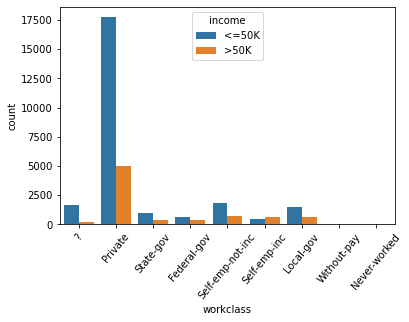

Count Plot for  education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64


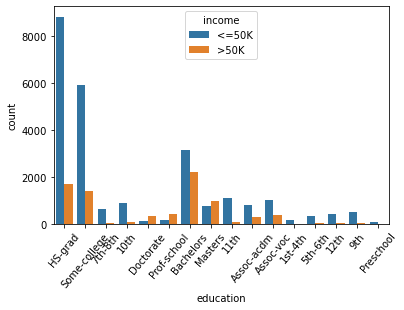

Count Plot for  marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital.status, dtype: float64


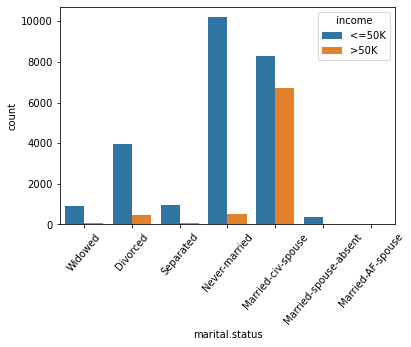

Count Plot for  occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64
Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
?                    0.056601
Transport-moving     0.049046
Handlers-cleaners    0.042075
Farming-fishing      0.030527
Tech-support         0.028500
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
Name: occupation, dtype: float64


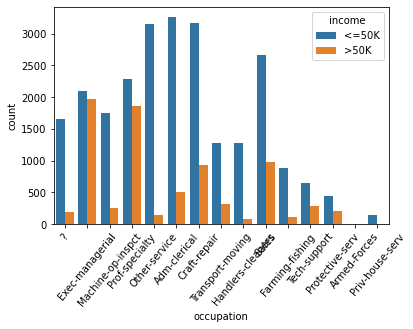

Count Plot for  relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64
Husband           0.405178
Not-in-family     0.255060
Own-child         0.155646
Unmarried         0.105832
Wife              0.048156
Other-relative    0.030128
Name: relationship, dtype: float64


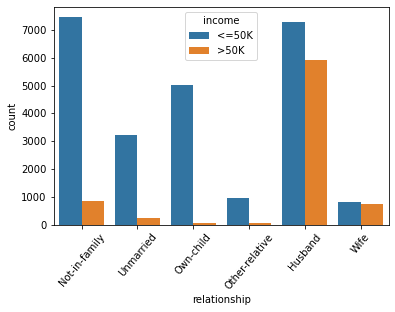

Count Plot for  race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: race, dtype: float64


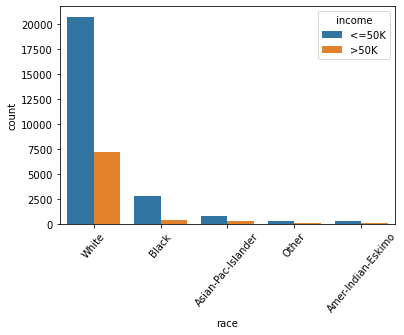

Count Plot for  sex
Male      21790
Female    10771
Name: sex, dtype: int64
Male      0.669205
Female    0.330795
Name: sex, dtype: float64


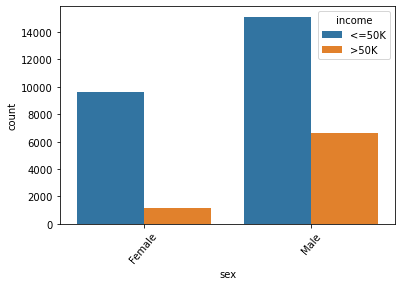

Count Plot for  native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             

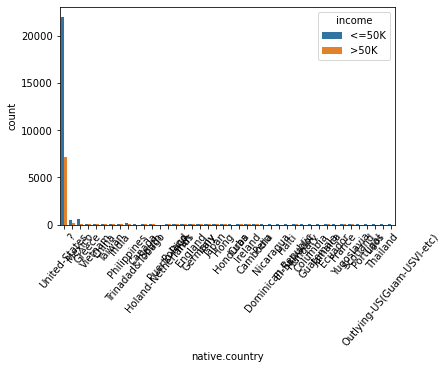

Count Plot for  income
<=50K    24720
>50K      7841
Name: income, dtype: int64
<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64


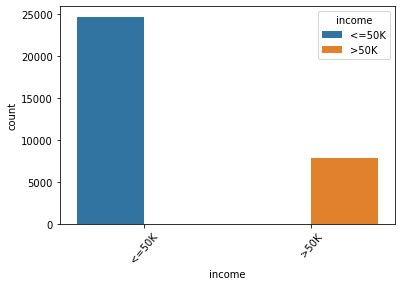

In [19]:
# Plotting Count Plot for Categorical data
for i in df.columns:
    if df[i].dtypes=='object':
        print('Count Plot for ', i)
        sns.countplot(x=df[i], hue=df['income'])
        plt.xticks(rotation=50)
        print(df[i].value_counts())
        print(df[i].value_counts(normalize=True))
        plt.show()

- Private employees are 69.7% of the total workclass out of which around 72 % are earning <=to 50K
- Most of the employees have completed HS-grad but the employees who have completed Bachelors are highest in number to earn >50k
- Around 40% employees are husbands out of which 75% are earning more than 50k. the wife is only 5% out of which only 9.5% earn more than 50k
- Around 85% people are of white race out of which 91% make more than 50k
- There are around 67% of male employees out of which 85% make more than 50 k. 
- 76% people make more than 50 k and 24 % make less than 50 k. The class is imbalanced and we will deal with it later


Distribution Plot for  age


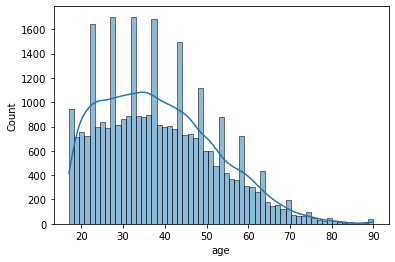

Distribution Plot for  fnlwgt


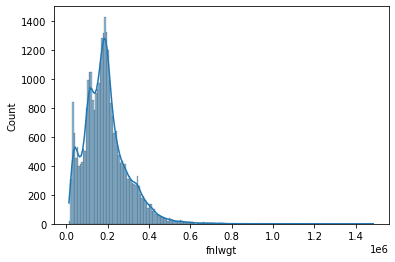

Distribution Plot for  education.num


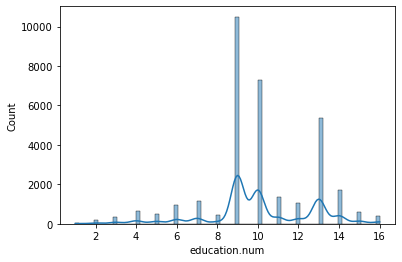

Distribution Plot for  capital.gain


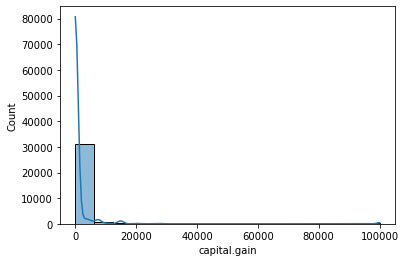

Distribution Plot for  capital.loss


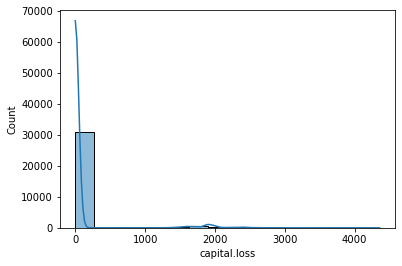

Distribution Plot for  hours.per.week


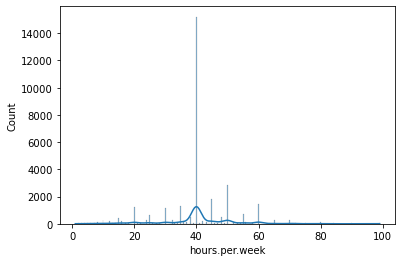

In [21]:
#Ploting histist plot for the Numerical columns
for i in df.columns:
    if df[i].dtypes!='object':
        print('Distribution Plot for ', i)
        sns.histplot(x=df[i],kde=True)
        plt.show()

- age is lightly positively skewed as there are entries of 90 years old 
- education.num is positively skewed- this column will be treated as categorical column
- fnlwgt is positively skewed
- capital.gain is highly positively skewed. It seems to have outliers.
- capital.loss is highly positively skewed.It seems to have outliers.
-hours.per.week is normally distributed

Distribution Plot for  age


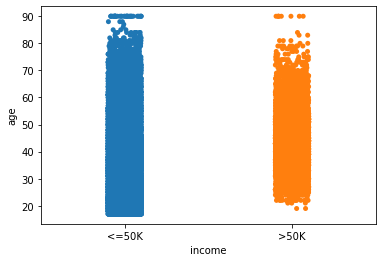

Distribution Plot for  workclass


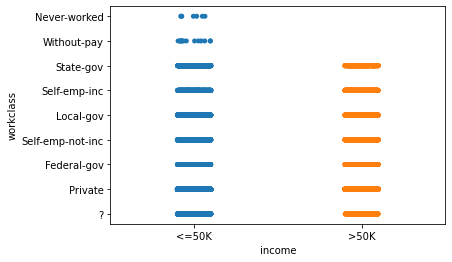

Distribution Plot for  fnlwgt


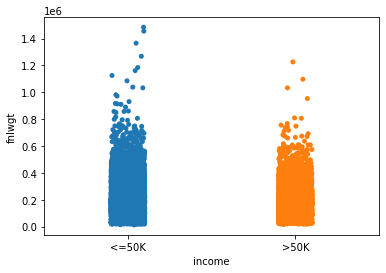

Distribution Plot for  education


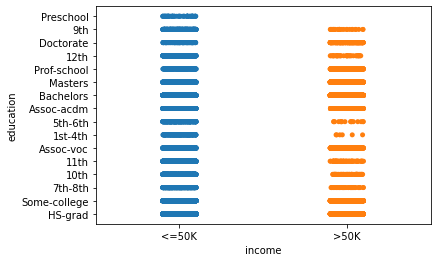

Distribution Plot for  education.num


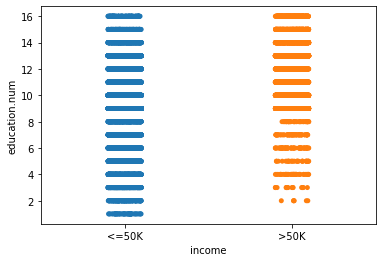

Distribution Plot for  marital.status


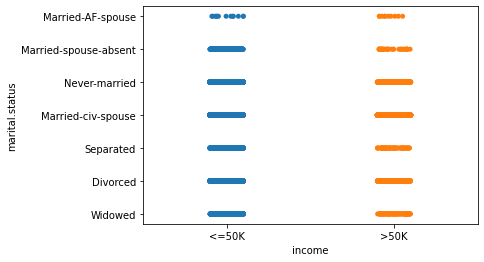

Distribution Plot for  occupation


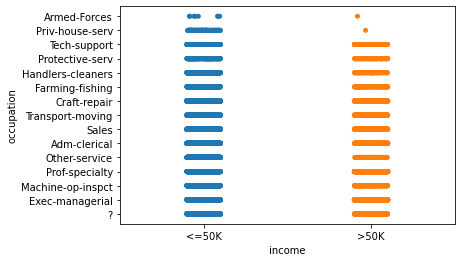

Distribution Plot for  relationship


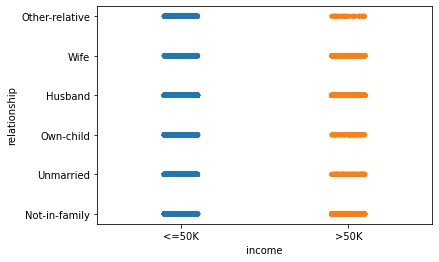

Distribution Plot for  race


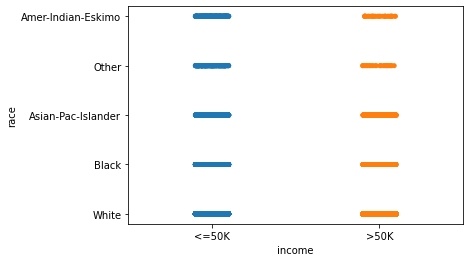

Distribution Plot for  sex


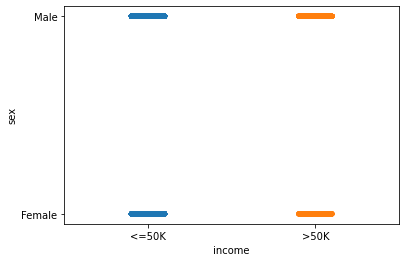

Distribution Plot for  capital.gain


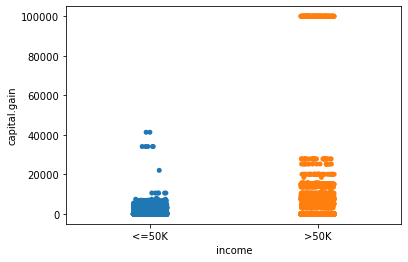

Distribution Plot for  capital.loss


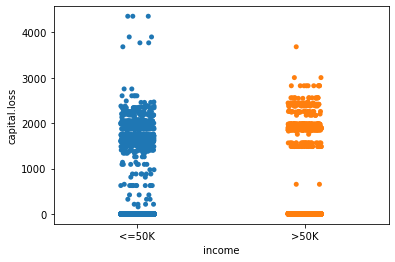

Distribution Plot for  hours.per.week


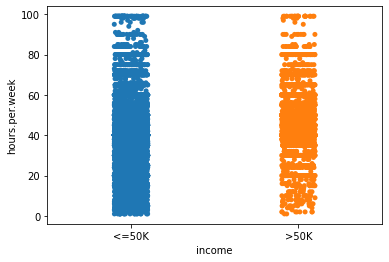

Distribution Plot for  native.country


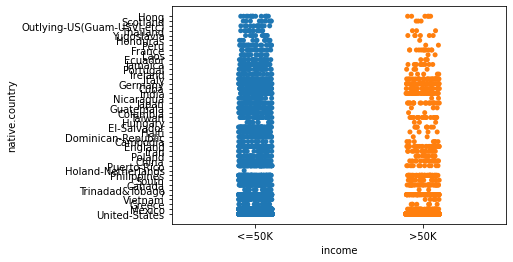

Distribution Plot for  income


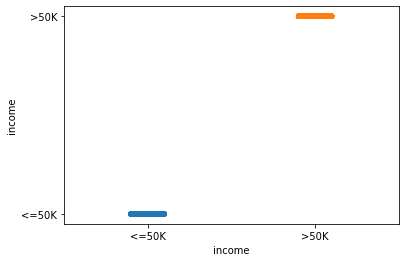

In [24]:
#Ploting scatterplot for bivariate analysis
for i in df.columns:
    print('Distribution Plot for ', i)
    sns.stripplot(y=df[i],x=df['income'])
    plt.show()

- 'Age': people earning more than 50 k are in age group 19 to 90. The older aged people could be businessme  or self employed. Rest most of the people are making <= 50k
-'workclass': The ones making >50 k are of workclass state-gov,self-employed,local-gov,,federal gov and private sector
-'fnlwgt': have >50k in 0 to 0.8e6
- 'education_num': The rising education num shows ore chances of greater than 50k income
- 'marital.status': very less people in both the category
- In occupation it is seen that >50k income is less in the category of armed forcesand the private house service
- Capital gain is seen from 0 to 10000 and captal loss is seen from 0 to 3800
- the more no of people having >50k in range of 40 to 60hrs/week working hrs

In [4]:
# Encoding the categorical columns using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


<AxesSubplot:>

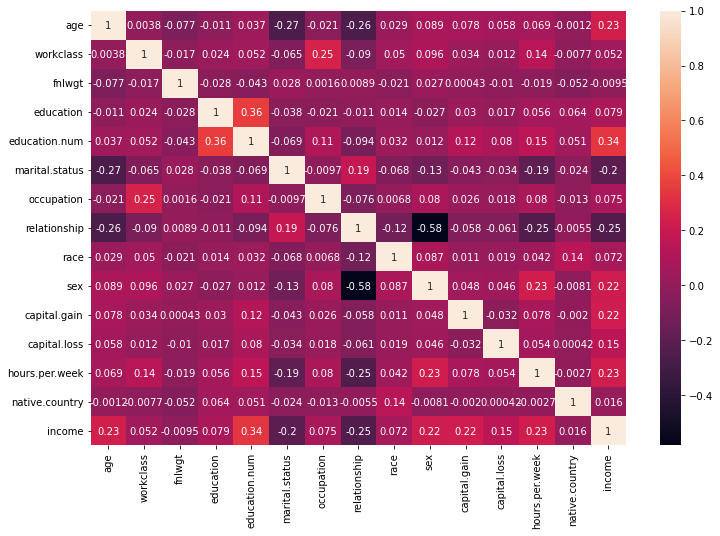

In [5]:
# Let's check correlation between the columns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

##### Correlation between target and features
- income is positively correlated with education_num and highly negatively correlated with relationship and marital.status
- Other variables are not that much in correlation with the target variable
-There is no multicollinearity between the features

# Data Pre-processing

In [6]:
# outliet treatment
from scipy.stats import zscore
z= np.abs(zscore(df))
z.shape

(32561, 15)

In [7]:
#setting threshold as 3
print(np.where(z>3))

(array([    0,     0,     1, ..., 32536, 32552, 32554], dtype=int64), array([ 0, 11,  0, ...,  8,  8,  8], dtype=int64))


In [8]:
df = df[(z<3).all(axis=1)]
df.shape

(27418, 15)

In [9]:
#calculating loss of data
loss = (32561-27418)/27418
loss

0.187577503829601

- This is 18% data loss which we can accept as the dataset is very high 32561

In [10]:
# Checking skewness 
df.skew()

age                0.483480
workclass         -0.737714
fnlwgt             0.626258
education         -0.957433
education.num     -0.144018
marital.status    -0.044388
occupation         0.131200
relationship       0.750249
race              -2.592997
sex               -0.684173
capital.gain       4.934777
capital.loss      29.326272
hours.per.week    -0.358404
native.country    -5.460784
income             1.324975
dtype: float64

In [11]:
# Splitting data into target and feature variables
x = df.drop(['income'], axis=1)
y = df['income']

print("shape of x is: ",x.shape)
print("shape of y is: ",y.shape)

shape of x is:  (27418, 14)
shape of y is:  (27418,)


In [12]:
# Removing skewness using power transform method

from sklearn.preprocessing import power_transform
X = power_transform(x, method = 'yeo-johnson')
X

array([[ 1.57858367e+00, -1.32438281e+00, -1.59355014e-01, ...,
         2.46635133e+01, -2.20942701e-01,  1.72130722e-01],
       [ 2.05029848e+00, -1.32438281e+00, -3.32760562e-01, ...,
         2.46635133e+01, -3.81371843e-02,  1.72130722e-01],
       [ 2.22427613e+00, -2.27425275e+00,  4.99227895e-01, ...,
         2.46635133e+01, -1.71989794e+00,  1.72130722e-01],
       ...,
       [ 2.73815977e-01,  1.66327653e-02, -2.20792600e-01, ...,
        -4.05457239e-02, -3.81371843e-02,  1.72130722e-01],
       [ 1.37261963e+00,  1.66327653e-02, -2.48466445e-01, ...,
        -4.05457239e-02, -3.81371843e-02,  1.72130722e-01],
       [-1.32727710e+00,  1.66327653e-02,  2.74729538e-01, ...,
        -4.05457239e-02, -1.71989794e+00,  1.72130722e-01]])

In [13]:
#checking for skewness is removed or not
skew_df=pd.DataFrame(X)
skew_df.skew()

0     -0.018273
1      0.073822
2     -0.035202
3     -0.314965
4      0.027982
5     -0.128665
6     -0.182665
7      0.108579
8     -2.533571
9     -0.684173
10     3.068802
11    24.624315
12     0.104419
13     0.777922
dtype: float64

- We cant further remove skewness as capital.loss is highly right tailed

In [14]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[ 1.57858367e+00, -1.32438281e+00, -1.59355014e-01, ...,
         2.46635133e+01, -2.20942701e-01,  1.72130722e-01],
       [ 2.05029848e+00, -1.32438281e+00, -3.32760562e-01, ...,
         2.46635133e+01, -3.81371843e-02,  1.72130722e-01],
       [ 2.22427613e+00, -2.27425275e+00,  4.99227895e-01, ...,
         2.46635133e+01, -1.71989794e+00,  1.72130722e-01],
       ...,
       [ 2.73815977e-01,  1.66327653e-02, -2.20792600e-01, ...,
        -4.05457239e-02, -3.81371843e-02,  1.72130722e-01],
       [ 1.37261963e+00,  1.66327653e-02, -2.48466445e-01, ...,
        -4.05457239e-02, -3.81371843e-02,  1.72130722e-01],
       [-1.32727710e+00,  1.66327653e-02,  2.74729538e-01, ...,
        -4.05457239e-02, -1.71989794e+00,  1.72130722e-01]])

- Variance Inflation factor score confirms there is no multicollinearity between the features

In [16]:
# Checking target variable class imbalance
y.value_counts()

0    21280
1     6138
Name: income, dtype: int64

In [17]:
#Balancing the data using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,y)
Y.value_counts()

0    21280
1    21280
Name: income, dtype: int64

- The class looks balanced now 

# Model Building

In [18]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lg = LogisticRegression()

In [19]:
# Findig random state

maxaccu = 0
maxrs = 0
for i in range(1,100):
    print("At Random state ", i)
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.20, random_state = i)
    lg.fit(Xtrain, Ytrain)
    Y_pred_train_lg = lg.predict(Xtrain)
    Y_pred_test_lg = lg.predict(Xtest)
    acc_train = accuracy_score(Ytrain,Y_pred_train_lg)
    acc_test = accuracy_score(Ytest,Y_pred_test_lg)
    print('Training Accuracy', acc_train, 'randon state',i)
    print('Testing Accuracy', acc_test, 'random state', i)
    if acc_test>maxaccu:
        maxaccu=acc_test
        maxrs=i
        print('max accuracy', maxaccu , 'max_random_state', i)

At Random state  1
Training Accuracy 0.7757871240601504 randon state 1
Testing Accuracy 0.772203947368421 random state 1
max accuracy 0.772203947368421 max_random_state 1
At Random state  2
Training Accuracy 0.773701832706767 randon state 2
Testing Accuracy 0.7820723684210527 random state 2
max accuracy 0.7820723684210527 max_random_state 2
At Random state  3
Training Accuracy 0.7765801221804511 randon state 3
Testing Accuracy 0.7711466165413534 random state 3
At Random state  4
Training Accuracy 0.7739074248120301 randon state 4
Testing Accuracy 0.7799577067669173 random state 4
At Random state  5
Training Accuracy 0.7772262687969925 randon state 5
Testing Accuracy 0.7704417293233082 random state 5
At Random state  6
Training Accuracy 0.7747004229323309 randon state 6
Testing Accuracy 0.7799577067669173 random state 6
At Random state  7
Training Accuracy 0.7748179041353384 randon state 7
Testing Accuracy 0.7793703007518797 random state 7
At Random state  8
Training Accuracy 0.77546405

In [20]:
# Checking for the Max. Accuracy at Random State
print('max accuracy', maxaccu , 'max_random_state', i)

max accuracy 0.7879464285714286 max_random_state 99


- using random_state = 99

In [21]:
# Splitting data into train and test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 99)

print("Shape of X_train is : ", X_train.shape)
print("Shape of X_test is : ", X_test.shape)
print("Shape of Y_train is : ", Y_train.shape)
print("Shape of Y_test is : ", Y_test.shape)

Shape of X_train is :  (34048, 14)
Shape of X_test is :  (8512, 14)
Shape of Y_train is :  (34048,)
Shape of Y_test is :  (8512,)


# 1. Logistic Regression

In [22]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)
Y_pred_train_lg = lg.predict(X_train)
Y_pred_test_lg = lg.predict(X_test)
print("Training accuracy is :", accuracy_score(Y_train,Y_pred_train_lg))
print("Testing accuracy is :", accuracy_score(Y_test,Y_pred_test_lg))
print(confusion_matrix(Y_test,Y_pred_test_lg))
print(classification_report(Y_test,Y_pred_test_lg))

Training accuracy is : 0.7735843515037594
Testing accuracy is : 0.7834821428571429
[[3265  990]
 [ 853 3404]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      4255
           1       0.77      0.80      0.79      4257

    accuracy                           0.78      8512
   macro avg       0.78      0.78      0.78      8512
weighted avg       0.78      0.78      0.78      8512



In [23]:
#AUC ROC Curve
# Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

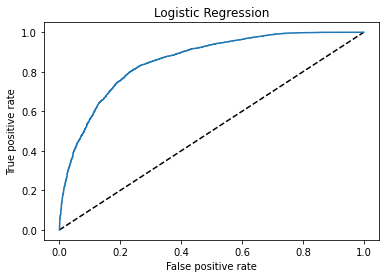

0.7834783492013015

In [24]:
#AUC ROC curve for Logistic Regression
Y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Linear Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(Y_test,lg.predict(X_test))

auc_score

# 2. Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred_train_dtc = dtc.predict(X_train)
Y_pred_test_dtc = dtc.predict(X_test)
print("Training accuracy is :", accuracy_score(Y_train,Y_pred_train_dtc))
print("Testing accuracy is :", accuracy_score(Y_test,Y_pred_test_dtc))
print(confusion_matrix(Y_test,Y_pred_test_dtc))
print(classification_report(Y_test,Y_pred_test_dtc))

Training accuracy is : 1.0
Testing accuracy is : 0.8580827067669173
[[3655  600]
 [ 608 3649]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4255
           1       0.86      0.86      0.86      4257

    accuracy                           0.86      8512
   macro avg       0.86      0.86      0.86      8512
weighted avg       0.86      0.86      0.86      8512



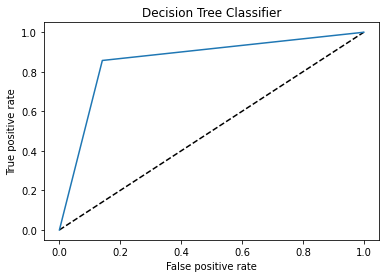

0.8580829197613828

In [26]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=dtc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,dtc.predict(X_test))

auc_score

# 3. Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred_train_rf = rf.predict(X_train)
Y_pred_test_rf = rf.predict(X_test)
print("Training accuracy is :", accuracy_score(Y_train,Y_pred_train_rf))
print("Testing accuracy is :", accuracy_score(Y_test,Y_pred_test_rf))
print(confusion_matrix(Y_test,Y_pred_test_rf))
print(classification_report(Y_test,Y_pred_test_rf))

Training accuracy is : 1.0
Testing accuracy is : 0.9021381578947368
[[3808  447]
 [ 386 3871]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4255
           1       0.90      0.91      0.90      4257

    accuracy                           0.90      8512
   macro avg       0.90      0.90      0.90      8512
weighted avg       0.90      0.90      0.90      8512



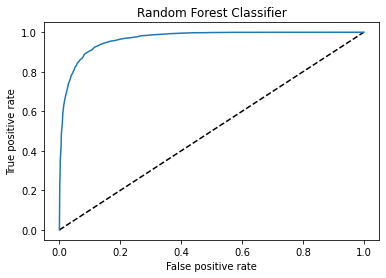

0.9021364686683191

In [28]:
#AUC ROC curve for Random Forest Classifier Classifier
Y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,rf.predict(X_test))

auc_score

# 4. KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_train_knn = knn.predict(X_train)
Y_pred_test_knn = knn.predict(X_test)
print("Training accuracy is :", accuracy_score(Y_train,Y_pred_train_knn))
print("Testing accuracy is :", accuracy_score(Y_test,Y_pred_test_knn))
print(confusion_matrix(Y_test,Y_pred_test_knn))
print(classification_report(Y_test,Y_pred_test_knn))

Training accuracy is : 0.8959997650375939
Testing accuracy is : 0.8613721804511278
[[3340  915]
 [ 265 3992]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      4255
           1       0.81      0.94      0.87      4257

    accuracy                           0.86      8512
   macro avg       0.87      0.86      0.86      8512
weighted avg       0.87      0.86      0.86      8512



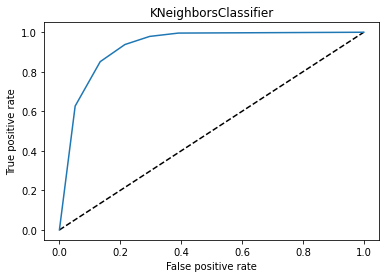

0.8613542304138866

In [30]:
#AUC ROC curve for  KNeighborsClassifier
Y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,knn.predict(X_test))

auc_score

# 5. Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_pred_train_gbc = gbc.predict(X_train)
Y_pred_test_gbc = gbc.predict(X_test)
print("Training accuracy is :", accuracy_score(Y_train,Y_pred_train_gbc))
print("Testing accuracy is :", accuracy_score(Y_test,Y_pred_test_gbc))
print(confusion_matrix(Y_test,Y_pred_test_gbc))
print(classification_report(Y_test,Y_pred_test_gbc))

Training accuracy is : 0.8672756109022557
Testing accuracy is : 0.8651315789473685
[[3558  697]
 [ 451 3806]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4255
           1       0.85      0.89      0.87      4257

    accuracy                           0.87      8512
   macro avg       0.87      0.87      0.87      8512
weighted avg       0.87      0.87      0.87      8512



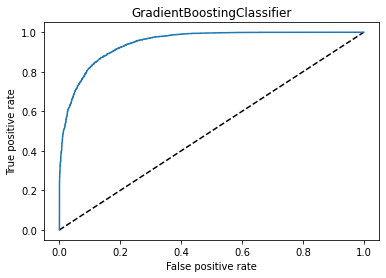

0.8651247809994018

In [33]:
#AUC ROC curve for  GradientBoostingClassifier
Y_pred_prob=gbc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,gbc.predict(X_test))

auc_score

# 6. Ada Boosting Classifier

In [34]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)
Y_pred_train_ada = ada.predict(X_train)
Y_pred_test_ada = ada.predict(X_test)
print("Training accuracy is :", accuracy_score(Y_train,Y_pred_train_ada))
print("Testing accuracy is :", accuracy_score(Y_test,Y_pred_test_ada))
print(confusion_matrix(Y_test,Y_pred_test_ada))
print(classification_report(Y_test,Y_pred_test_ada))

Training accuracy is : 0.8482730263157895
Testing accuracy is : 0.8484492481203008
[[3533  722]
 [ 568 3689]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4255
           1       0.84      0.87      0.85      4257

    accuracy                           0.85      8512
   macro avg       0.85      0.85      0.85      8512
weighted avg       0.85      0.85      0.85      8512



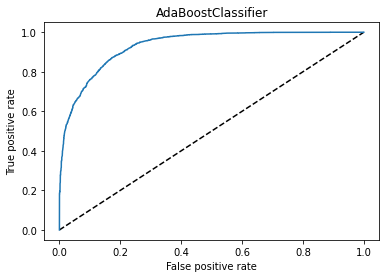

0.8484449887887704

In [35]:
#AUC ROC curve for  AdaBoostClassifier
Y_pred_prob=ada.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,ada.predict(X_test))

auc_score

# 7. Naives Bayes(GaussianNB)

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred_train_gnb = gnb.predict(X_train)
Y_pred_test_gnb = gnb.predict(X_test)
print("Training accuracy is :", accuracy_score(Y_train,Y_pred_train_gnb))
print("Testing accuracy is :", accuracy_score(Y_test,Y_pred_test_gnb))
print(confusion_matrix(Y_test,Y_pred_test_gnb))
print(classification_report(Y_test,Y_pred_test_gnb))


Training accuracy is : 0.765360667293233
Testing accuracy is : 0.7744360902255639
[[2959 1296]
 [ 624 3633]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      4255
           1       0.74      0.85      0.79      4257

    accuracy                           0.77      8512
   macro avg       0.78      0.77      0.77      8512
weighted avg       0.78      0.77      0.77      8512



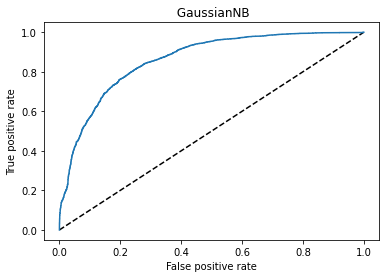

0.7744175281081247

In [37]:
#AUC ROC curve for  GaussianNB
Y_pred_prob=gnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=' GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(' GaussianNB')
plt.show()

auc_score=roc_auc_score(Y_test,gnb.predict(X_test))

auc_score

# Cross validation

In [38]:
from sklearn.model_selection import cross_val_score

# validation accuracy

model=[lg,dtc,rf,knn,gbc,ada,gnb]

for i in model:
    for j in range(8,18):
        print('taking cv =', j)
        cr_score=cross_val_score(i, X, Y, cv=j)
        print('Cross validation score for ' , i ,' is', cr_score)
        print('Mean of Cross Val. score is ', cr_score.mean())

taking cv = 8
Cross validation score for  LogisticRegression()  is [0.6768797  0.76071429 0.78496241 0.78966165 0.77932331 0.78590226
 0.79304511 0.77819549]
Mean of Cross Val. score is  0.7685855263157895
taking cv = 9
Cross validation score for  LogisticRegression()  is [0.66694861 0.76506661 0.77923451 0.77902305 0.78494396 0.78621273
 0.78515542 0.79826602 0.77411168]
Mean of Cross Val. score is  0.7687736216647899
taking cv = 10
Cross validation score for  LogisticRegression()  is [0.65742481 0.76104323 0.77067669 0.78406955 0.78970865 0.77631579
 0.78947368 0.78712406 0.79746241 0.77161654]
Mean of Cross Val. score is  0.7684915413533835
taking cv = 11
Cross validation score for  LogisticRegression()  is [0.64806202 0.76634789 0.75756009 0.78831739 0.78004652 0.78547428
 0.78883432 0.78366503 0.78599121 0.80253295 0.7699664 ]
Mean of Cross Val. score is  0.7687998293659271
taking cv = 12
Cross validation score for  LogisticRegression()  is [0.64082323 0.7547223  0.76205244 0.7919

- Selecting Random forest Classifier as it is giving 88.91% testing accuracy at fold 15 and is the highest when compared with the other classifiers.
- Hence selecting the RFC for further analysis.

# Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to be passed in GridSearchCV
parameters = {
    'n_estimators':[100,300,500],
    'criterion':['gini','entropty'],
    'max_features':['auto','log2']
 
} 

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=16,
                scoring='accuracy')

In [41]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=16, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropty'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [42]:
GCV.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}

In [43]:
# Checking score with best parameter
final_model=RandomForestClassifier(criterion='gini',max_features='auto',n_estimators=100)
final_model.fit(X_train,Y_train)
Y_pred_final=final_model.predict(X_test)
print('Final Accuracy is with Random Forest Classifier = ',accuracy_score(Y_test,Y_pred_final))

Final Accuracy is with Random Forest Classifier =  0.902608082706767


<function matplotlib.pyplot.show(close=None, block=None)>

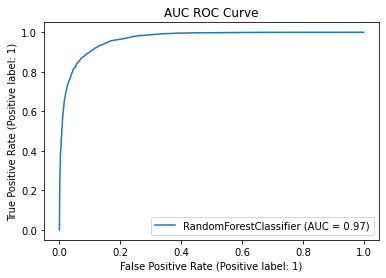

In [44]:
#AUC ROC of Best Estimator
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title('AUC ROC Curve')
plt.show

# Saving the model

In [45]:
import joblib
joblib.dump(GCV.best_estimator_, "Census Income Prediction.pkl")

['Census Income Prediction.pkl']

# Prediction

In [47]:
a=np.array(Y_test)
predicted=np.array(Y_pred_final)
df_con=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))
df_con

,Original,Predicted
0,0,0
1,1,0
2,0,0
3,1,1
4,1,1
...,...,...
8507,1,1
8508,1,1
8509,0,0
8510,1,1


# THE END